# 2. Transfer Learning

# Part 1:

## Loading and pre-processing an image
We can load the image using any library such as OpenCV, PIL, skimage etc. We perform the following steps on an input image:

<ul>
<li>Load the image. This is done using the load_img() function. Keras uses the PIL format for loading images. Thus, the image is in width x height x channels format.</li>
<li>Convert the image from PIL format to Numpy format using img_to_array() function.</li>
<li>The networks accept a 4-dimensional Tensor as an input of the form ( batchsize, height, width, channels). This is done using the expand_dims() function in Numpy.</li>
<li>
Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet. The values for ImageNet are : [ 103.939, 116.779, 123.68 ]. This is done using the preprocess_input() function in Keras.
</li>
<li>
Get the classification result, which is a Tensor of dimension ( batch size x 1000 ). This is done by model.predict() function.
</li>

<li>
Convert the result to human-readable labels. This is done by decode_predictions.
</li>
</ul>

In [81]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import numpy as np
import pandas as pd

## Extracing weights & biases of VGG-16 from Keras

In [ ]:
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
model.save('./VGG16_Weights_Biases.h5')

## Part 2: VGG-16 Implementation

In [ ]:
model = Sequential()
model.add(Convolution2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dense(1000, activation='sigmoid', name='output'))

In [ ]:
model.load_weights('VGG16_Weights_Biases.h5')

## Predicting labels from 3 sample images
The VGG-16 model predicted all of these images correctly.

### Image 1: Coffee Mug

In [24]:
def preprocess_image_for_vgg16(image) :
  # Convert the image pixels to a numpy array
  image = img_to_array(image)

  # Reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  
  # Prepare the image for the VGG model
  image = preprocess_input(image)
  return image

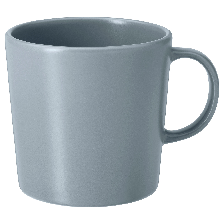

In [ ]:
sample_mug = load_img('sample_mug.jpg', target_size=(224, 224))
sample_mug

In [ ]:
sample_mug = preprocess_image_for_vgg16(sample_mug)

In [ ]:
# Predict the probability across all output classes
yhat = model.predict(sample_mug)
# Convert the probabilities to class labels
label = decode_predictions(yhat)
# Retrieve the most likely result, e.g. highest probability
label = label[0][0]
# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 0us/step
coffee_mug (100.00%)


### Image 2: Golden Retriever

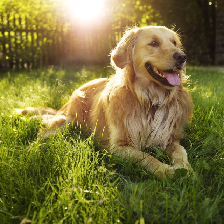

In [ ]:
sample_dog = load_img('golden-retriever-royalty-free-image-506756303-1560962726.jpg', target_size=(224, 224))
sample_dog

In [ ]:
sample_dog = preprocess_image_for_vgg16(sample_dog)

In [ ]:
# Predict the probability across all output classes
yhat = model.predict(sample_dog)
# Convert the probabilities to class labels
label = decode_predictions(yhat)
# Retrieve the most likely result, e.g. highest probability
label = label[0][0]
# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

golden_retriever (100.00%)


### Image 3: Rooster

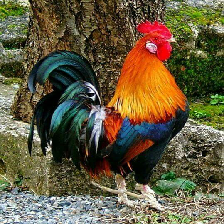

In [ ]:
sample_rooster = load_img('Rooster.jpg', target_size=(224, 224))
sample_rooster

In [ ]:
sample_rooster = preprocess_image_for_vgg16(sample_rooster)

In [ ]:
# Predict the probability across all output classes
yhat = model.predict(sample_rooster)
# Convert the probabilities to class labels
label = decode_predictions(yhat)
# Retrieve the most likely result, e.g. highest probability
label = label[0][0]
# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

cock (100.00%)


# Part 3

## What types of image does VGG-16 classify?
The VGG16 model achieved 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to **1000 classes**. For example the model can predict these classes: (You can find the labels that VGG-16 can predict from <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">here</a>)

<ul>
  <li>goldfish, Carassius auratus</li>
  <li>hen</li>
  <li>kite</li>
  <li>and 997 more class...</li>
</ul>

## What should we do if the classes we want classify are not in the VGG-16 model?
The answer is **Transfer Learning**.

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

Now suppose we want to classify different types of flowers. The VGG-16 model has seen many images of flowers but not specific types. We can modify the model architecture to solve this problem.

We know that the ImageNet dataset contains images of different flowers.We can import a model that has been pre-trained on the ImageNet dataset and use its **pre-trained layers** for **feature extraction**.

Now we can't use the entirety of the pre-trained model's architecture. The Fully-Connected layer generates 1,000 different output labels, whereas our Target Dataset has only 10 classes for prediction. So we'll import a pre-trained model like VGG16, but remove the Fully-Connected layer of the model.

## Transfer Learning Approaches

### 1. Feature Extraction
We use the pre-trained model's architecture to create a new dataset from our input images in this approach. We'll import the Convolutional and Pooling layers but leave out the Fully-Connected layer of the model.

Recall that our example model, VGG16, has been trained on millions of images - including vehicle images. Its convolutional layers and trained weights can detect generic features such as edges, colors, wheels, windshields, etc.

### 2. Fine-Tuning Extraction (The selected method)
The goal of fine-tuning is to allow a portion of the pre-trained layers to retrain. Steps of Fine-Tuining we will follow in this problem:
<ul>
<li>Changing the fully connected and output layer.</li>
<li>Freezing pre-trained convolutional layers</li>
<li>Un-freezing the last few pre-trained layers training.</li>
</ul>

# Fine-Tuning VGG-16 For Classifying Flowers

In [57]:
import tensorflow_datasets as tfds

In [58]:
import pathlib
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [111]:
batch_size = 16
image_size = 224
train_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=0.2,
            subset="training",
            seed=123,
            image_size=(image_size, image_size),
            batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=0.2,
            subset="validation",
            seed=123,
            image_size=(image_size, image_size),
            batch_size=batch_size)

#VGG-16 Pre-processing
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


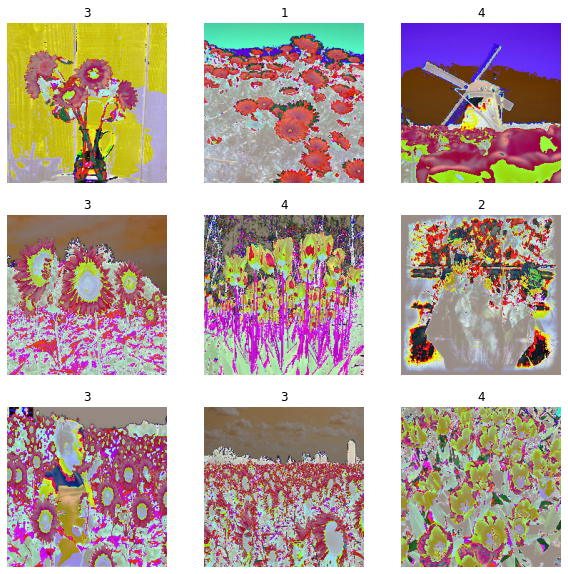

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Load the pre-trained model
Here, we'll load pre-trained weights & biases from VGG-16 model without the top layer which consists of Fully Connected Layers.

In [73]:
from tensorflow.keras.applications import vgg16
vgg_conv = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(image_size, image_size, 3))

## Freeze the required layers
In Keras, each layer has a parameter called “trainable”. For freezing the weights of a particular layer, we should set this parameter to False, indicating that this layer should not be trained.

In [74]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
  layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fcbb078ea90> False
<keras.layers.convolutional.Conv2D object at 0x7fcc46836c10> False
<keras.layers.convolutional.Conv2D object at 0x7fcbca04fb10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fcbb045e690> False
<keras.layers.convolutional.Conv2D object at 0x7fcbb1ea0850> False
<keras.layers.convolutional.Conv2D object at 0x7fcbb1ea7310> False
<keras.layers.pooling.MaxPooling2D object at 0x7fcbb1ea7050> False
<keras.layers.convolutional.Conv2D object at 0x7fcbb1f835d0> False
<keras.layers.convolutional.Conv2D object at 0x7fcbca024f90> False
<keras.layers.convolutional.Conv2D object at 0x7fcbb1eb0190> False
<keras.layers.pooling.MaxPooling2D object at 0x7fcbb1ead210> False
<keras.layers.convolutional.Conv2D object at 0x7fcbb1eb6090> False
<keras.layers.convolutional.Conv2D object at 0x7fcc46836050> False
<keras.layers.convolutional.Conv2D object at 0x7fcbb1e3f750> False
<keras.layers.pooling.MaxPooling2D object at 0x7fcbb1e94050>

## Create a new model
Now that we have set the trainable parameters of our base network, we would like to add a classifier on top of the convolutional base. We will simply add a fully connected layer followed by a softmax layer with 196 outputs.

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dense_18 (Dense)            (None, 1024)              25691136  
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 5)                 5125      
                                                                 
Total params: 40,410,949
Trainable params: 25,696,261
Non-trainable params: 14,714,688
_________________________________________________________________


## Training the model

In [106]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [107]:
%%time
# Train the model
model.fit(
  train_ds,
  validation_data=val_ds,
  
  epochs=50
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


184/184 [==============================] - 15s 76ms/step - loss: 17.8163 - accuracy: 0.7548 - val_loss: 5.5084 - val_accuracy: 0.8501
Epoch 2/50
184/184 [==============================] - 14s 75ms/step - loss: 3.3987 - accuracy: 0.8907 - val_loss: 5.0593 - val_accuracy: 0.8529
Epoch 3/50
184/184 [==============================] - 15s 78ms/step - loss: 1.5932 - accuracy: 0.9312 - val_loss: 3.9678 - val_accuracy: 0.8883
Epoch 4/50
184/184 [==============================] - 14s 76ms/step - loss: 1.0977 - accuracy: 0.9537 - val_loss: 5.4363 - val_accuracy: 0.8733
Epoch 5/50
184/184 [==============================] - 14s 75ms/step - loss: 1.1068 - accuracy: 0.9571 - val_loss: 3.9683 - val_accuracy: 0.8706
Epoch 6/50
184/184 [==============================] - 14s 75ms/step - loss: 1.1140 - accuracy: 0.9595 - val_loss: 5.8394 - val_accuracy: 0.8747
Epoch 7/50
184/184 [==============================] - 14s 75ms/step - loss: 1.0115 - accuracy: 0.9649 - val_loss: 7.4864 - val_accuracy: 0.8624
Ep

In [108]:
loss_hist = model.history.history
loss_hist

{'accuracy': [0.7547683715820312,
  0.8906675577163696,
  0.9311988949775696,
  0.9536784887313843,
  0.9570844769477844,
  0.9594686627388,
  0.9649182558059692,
  0.9649182558059692,
  0.9618528485298157,
  0.9587874412536621,
  0.9625340700149536,
  0.9543596506118774,
  0.970708429813385,
  0.968664824962616,
  0.9693460464477539,
  0.9782016277313232,
  0.9785422086715698,
  0.9802452325820923,
  0.9792234301567078,
  0.9717302322387695,
  0.9805858135223389,
  0.9812670350074768,
  0.9761580228805542,
  0.9826294183731079,
  0.9805858135223389,
  0.9873978495597839,
  0.9884195923805237,
  0.9870572090148926,
  0.9877384305000305,
  0.9880790114402771,
  0.9921662211418152,
  0.9901226162910461,
  0.9918256402015686,
  0.9870572090148926,
  0.9870572090148926,
  0.9877384305000305,
  0.9877384305000305,
  0.9870572090148926,
  0.9925068020820618,
  0.9904631972312927,
  0.9894413948059082,
  0.9914849996566772,
  0.9901226162910461,
  0.9884195923805237,
  0.9908038377761841,
  0

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from sklearn.metrics import classification_report

def show_diagrams(model,loss_his,flattened = True) :
    
    plt.plot(loss_his['loss'])
    plt.plot(loss_his['val_loss'])
    plt.title('Loss per epoch')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

    predictions = np.array([])
    y_val =  np.array([])
    for x, y in val_ds:
      predictions = np.concatenate([predictions, model.predict(x).argmax(axis=-1)])
      y_val = np.concatenate([y_val, y])

    plt.figure(figsize=(10,8))
    conf_mat = confusion_matrix(predictions.tolist(), y_val.tolist())
    sns.heatmap(conf_mat, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')

    print(classification_report(y_val.tolist(), predictions.tolist()))

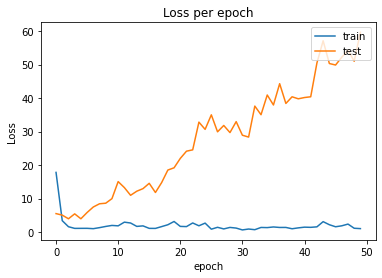

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       129
         1.0       0.87      0.95      0.91       176
         2.0       0.79      0.87      0.83       120
         3.0       0.95      0.82      0.88       152
         4.0       0.86      0.87      0.86       157

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.88      0.88      0.88       734



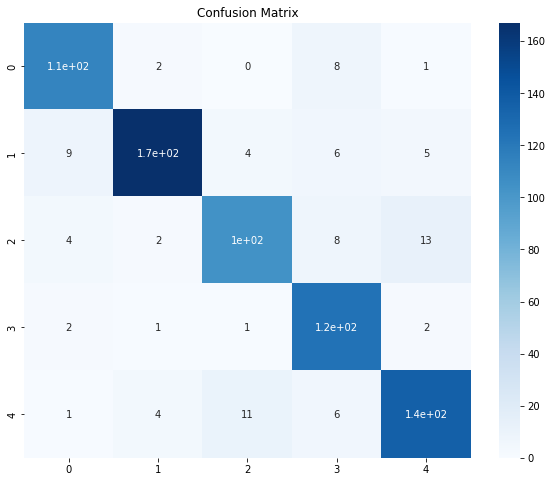

In [110]:
show_diagrams(model,loss_hist)